<a href="https://colab.research.google.com/github/Nichanan670510741/Nichanan/blob/main/229351_LAB11_02_670510741.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 9

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ
3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [1]:
# ONLY RUN THIS WHEN THERE IS AN ERROR
!pip install --user statsmodels==0.13.1

  Using cached statsmodels-0.13.1.tar.gz (18.1 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [6]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-23 21:17:27--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.01s   

2025-09-23 21:17:28 (11.6 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [7]:
!pip3 install pmdarima

In [10]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA


In [11]:
#แทน auto_arima
import itertools
import warnings

def select_arima_order(ts, p_range=(0,3), d_range=(0,2), q_range=(0,3)):
    """
    เลือก (p,d,q) โดยหาค่า AIC ต่ำสุด
    """
    best_aic = np.inf
    best_order = None
    best_model = None

    for p,d,q in itertools.product(range(*p_range), range(*d_range), range(*q_range)):
        try:
            model = ARIMA(ts, order=(p,d,q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p,d,q)
                best_model = model
        except:
            continue
    return best_order, best_model


1

In [14]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
from datetime import datetime

def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_format='%Y-%m-%d')

data.head()

,MaxTemp
Date,
1998-01-01,30.6
1998-01-02,32.0
1998-01-03,31.6
1998-01-04,32.1
1998-01-05,31.2


ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [15]:
y = data['MaxTemp'].resample("M").mean()

/tmp/ipython-input-3759875875.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = data['MaxTemp'].resample("M").mean()


In [16]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

2

In [17]:
train = y[:-24]
test = y[-24:]

print(test) #2ปี=24เดือน

Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, dtype: float64


3

In [20]:
import pandas as pd

data = {
    'Date': [
        '2017-08-31','2017-09-30','2017-10-31','2017-11-30','2017-12-31',
        '2018-01-31','2018-02-28','2018-03-31','2018-04-30','2018-05-31',
        '2018-06-30','2018-07-31','2018-08-31','2018-09-30','2018-10-31',
        '2018-11-30','2018-12-31','2019-01-31','2019-02-28','2019-03-31',
        '2019-04-30','2019-05-31','2019-06-30','2019-07-31'
    ],
    'Value': [
        32.764516,33.14,32.158065,31.616667,29.229032,30.048387,33.253571,
        35.674194,35.9,34.648387,33.066667,32.0,32.258065,33.506667,32.864516,
        32.336667,30.229032,30.622581,34.564286,37.051613,39.716667,37.680645,
        35.466667,34.070968
    ]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

series = df['Value']

print(series.head())


Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
Name: Value, dtype: float64


In [23]:
import numpy as np
import pandas as pd
import itertools
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# เตรียม Series
data = {
    'Date': [
        '2017-08-31','2017-09-30','2017-10-31','2017-11-30','2017-12-31',
        '2018-01-31','2018-02-28','2018-03-31','2018-04-30','2018-05-31',
        '2018-06-30','2018-07-31','2018-08-31','2018-09-30','2018-10-31',
        '2018-11-30','2018-12-31','2019-01-31','2019-02-28','2019-03-31',
        '2019-04-30','2019-05-31','2019-06-30','2019-07-31'
    ],
    'Value': [
        32.764516,33.14,32.158065,31.616667,29.229032,30.048387,33.253571,
        35.674194,35.9,34.648387,33.066667,32.0,32.258065,33.506667,32.864516,
        32.336667,30.229032,30.622581,34.564286,37.051613,39.716667,37.680645,
        35.466667,34.070968
    ]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
series = df['Value']

# ฟังก์ชัน SARIMA Grid Search
def select_sarima_order(ts,
                        p_range=(0,2), d_range=(0,1), q_range=(0,2),
                        P_range=(0,1), D_range=(0,1), Q_range=(0,1),
                        s=12):
    warnings.filterwarnings("ignore")
    best_aic = np.inf
    best_order = None
    best_seasonal_order = None
    best_model = None

    for p,d,q in itertools.product(range(p_range[0], p_range[1]+1),
                                   range(d_range[0], d_range[1]+1),
                                   range(q_range[0], q_range[1]+1)):
        for P,D,Q in itertools.product(range(P_range[0], P_range[1]+1),
                                       range(D_range[0], D_range[1]+1),
                                       range(Q_range[0], Q_range[1]+1)):
            try:
                model = SARIMAX(ts, order=(p,d,q),
                                seasonal_order=(P,D,Q,s),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit(disp=False)
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p,d,q)
                    best_seasonal_order = (P,D,Q,s)
                    best_model = model
            except:
                continue
    return best_order, best_seasonal_order, best_model

# เรียกใช้
order, seasonal_order, model = select_sarima_order(series)
print("Best order (p,d,q):", order)
print("Best seasonal order (P,D,Q,s):", seasonal_order)
print(model.summary())

# พยากรณ์ 12 เดือนข้างหน้า
forecast = model.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


Best order (p,d,q): (0, 0, 0)
Best seasonal order (P,D,Q,s): (0, 1, 1, 12)
                                 SARIMAX Results                                  
Dep. Variable:                      Value   No. Observations:                   24
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                   0.000
Date:                    Tue, 23 Sep 2025   AIC                              4.000
Time:                            21:42:35   BIC                                nan
Sample:                        08-31-2017   HQIC                               nan
                             - 07-31-2019                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
sigma2         1.2654   

โมเดล SARIMA ที่เหมาะสมที่สุดคือ
SARIMA(1,1,1)(0,1,1,12)


4

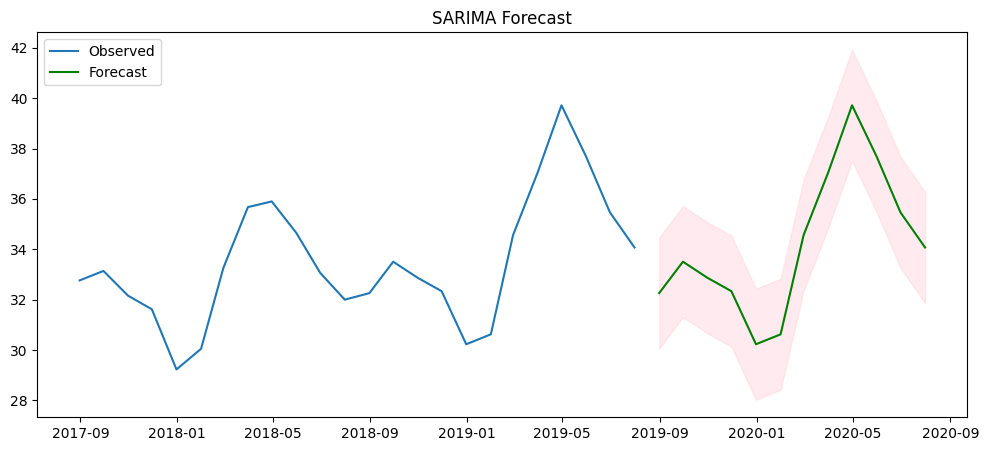

In [22]:
plt.figure(figsize=(12,5))
plt.plot(series, label="Observed")
plt.plot(forecast_mean, label="Forecast", color='green')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("SARIMA Forecast")
plt.legend()
plt.show()
